In [87]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [110]:
#x = np.arange(-0.34, 0.38, 0.04).reshape(-1,1)

#a2029 = [1.4291803, 1.5800493, 1.6747934, 1.7683733, 1.8671937, 
#         1.7412052, 1.8003217, 1.8680643, 2.0353959, 2.2804410, 2.3596058, 2.5568032, 2.3911042, 2.7337391, 
#         2.8212795, 2.4249928, 2.5260608, 2.5835605]

#a478 = [1.6135122, 1.7087786, 1.7700109, 1.8223212, 2.0058734, 
#        1.9589638, 2.0084295, 2.1050570, 2.2189603, 2.3041251, 2.6077962, 2.6040533, 2.5609329, 2.8893671, 
#        2.9318752, 3.0235491, 2.8668058, 3.0285752]

#x = np.arange(-0.5, 0.54, 0.04).reshape(-1,1)

#a2029 = [1.0772066, 1.1735725, 1.2534807, 1.3332615, 1.4291803, 1.5800493, 1.6747934, 1.7683733, 1.8671937, 
#         1.7412052, 1.8003217, 1.8680643, 2.0353959, 2.2804410, 2.3596058, 2.5568032, 2.3911042, 2.7337391, 
#         2.8212795, 2.4249928, 2.5260608, 2.5835605, 3.1244431, 3.2325501, 3.1868556, 2.9287734]

#a478 = [1.2688726, 1.3544704, 1.4386767, 1.5310760, 1.6135122, 1.7087786, 1.7700109, 1.8223212, 2.0058734, 
#        1.9589638, 2.0084295, 2.1050570, 2.2189603, 2.3041251, 2.6077962, 2.6040533, 2.5609329, 2.8893671, 
#        2.9318752, 3.0235491, 2.8668058, 3.0285752, 2.9629195, 3.0804749, 3.0482109, 3.0184207]

#a2029 = [1.2826542, 1.3401256, 1.3823687, 1.4501668, 1.5124367, 1.5929255, 1.6863663, 1.7966770, 1.8889195, 
#         1.7613186, 1.8856879, 1.9529696, 2.1335406, 2.2785585, 2.3669431, 2.4476480, 2.2985930, 2.6150789, 
#         2.3998766, 2.4803078, 2.4956906, 2.5769887, 2.6180964, 2.6679676, 2.6432900, 2.7466025]

#a478 = [1.2869883, 1.3735428, 1.4639229, 1.5467579, 1.6327049, 1.7174429, 1.7895564, 1.8628595, 1.9207137,
#        1.9826810, 2.0376923, 2.1163950, 2.1840553, 2.3018329, 2.6061447, 2.7021179, 2.5248508, 2.8187919, 
#        2.7814896, 2.7894201, 2.9734919, 2.9280529, 3.2780650, 3.2955129, 3.2019422, 3.5643568]

In [195]:
x = np.arange(-0.35, 0.35, 0.05).reshape(-1,1)

#x = np.arange(0.65, 1.35, 0.05). reshape(-1,1)

a2029 =  [1.4073168, 1.5788741, 1.7006574, 1.8124026, 1.9614995, 1.8004167, 1.8936535, 2.1675892, 2.1951625, 
          2.4778070, 2.6397548, 2.3560307, 2.7997649, 2.5260608]

a0478 = [1.5925466, 1.7029037, 1.8131893, 1.9556409, 1.9012963, 2.0002646, 2.1947467, 2.2340350, 2.3883591, 
         2.6035962, 2.6825056, 2.6253080, 2.7040346, 2.8668058]

pks0745 = [1.0403692, 1.1225858, 1.1960264, 1.2733448, 1.3477119, 1.4183117, 1.4948213, 1.5679821, 1.6367103, 
           1.7068665, 1.7836441, 1.8458772, 1.9222113, 1.9931729]

planck_clusters = [a2029, a0478, pks0745]
planck_names = ['A2029', 'A0478', 'PKS0745']

#x = np.log(x)
#planck_clusters = np.log(planck_clusters)

slope = []

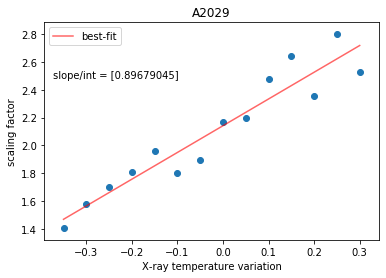

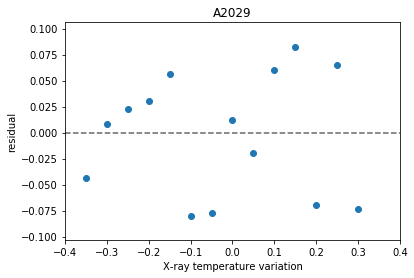

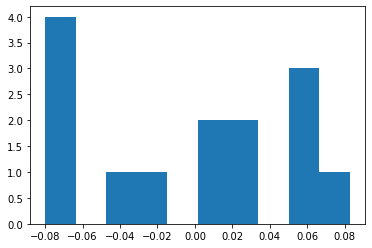

mu = -0.0017949891993549402
stdev = 0.056297861200980334



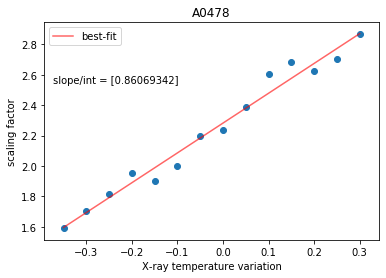

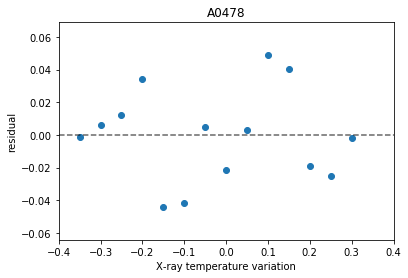

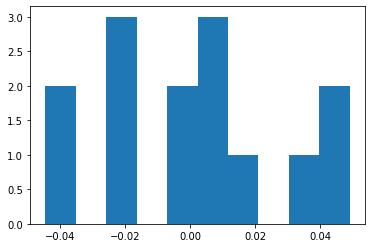

mu = -0.0003736031566853525
stdev = 0.027534781705599292



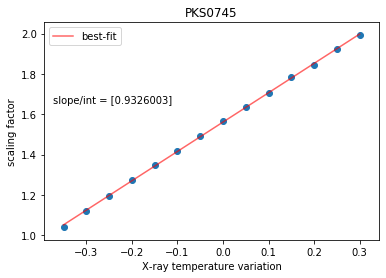

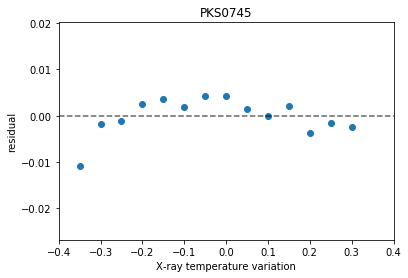

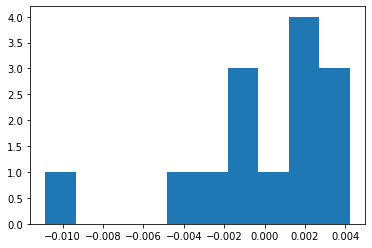

mu = -0.00011701928959022565
stdev = 0.0038620613876807898



In [196]:
for i in range(0, 3):

    fig, ax = plt.subplots()
    ax.scatter(x, planck_clusters[i])
    plt.title(planck_names[i])
    plt.xlabel('X-ray temperature variation')
    plt.ylabel('scaling factor')

    reg = LinearRegression().fit(x, planck_clusters[i])
    pred_y = reg.predict(x)
    ax.plot(x, pred_y, color='red', label='best-fit', alpha=0.6)
    plt.text(ax.get_xlim()[0] + 0.02, ax.get_ylim()[1] - 0.4, s='slope/int = ' + str(reg.coef_/reg.intercept_), horizontalalignment='left')
    plt.legend()
    #plt.savefig('xray_temp/' + planck_names[i] + '_fit.jpg')
    plt.show()
    
    slope.append((reg.coef_/reg.intercept_)[0])

    residuals = planck_clusters[i] - pred_y
    chisq = (planck_clusters[i] - pred_y)**2 / pred_y

    fig, ax = plt.subplots()
    ax.scatter(x, np.log(planck_clusters[i]/pred_y))
    ax.hlines(0, -0.4, 0.4, ls='--', alpha=0.6)
    ax.set_xlim(-0.4, 0.4)
    plt.xlabel('X-ray temperature variation')
    plt.ylabel('residual')
    plt.title(planck_names[i])
    #plt.savefig('xray_temp/' + planck_names[i] + '_residuals.jpg')
    plt.show()

    plt.hist(np.log(planck_clusters[i]/pred_y))
    mu, std = stats.norm.fit(np.log(planck_clusters[i]/pred_y))
    xmin, xmax = plt.xlim()
    x_fit = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x_fit, mu, std)
    #plt.plot(x_fit, p, 'k-', lw=2, alpha=0.6, label='')
    #plt.savefig('xray_temp/' + planck_names[i] + '_hist.jpg')
    plt.show()
    print('mu = ' + str(mu))
    print('stdev = ' + str(std) + '\n')

In [197]:
x = np.arange(-0.35, 0.35, 0.05).reshape(-1,1)
#x = np.arange(0.65, 1.35, 0.05). reshape(-1,1)

a2204 = [0.75096554, 0.78908694, 0.82656252, 0.86273003, 0.89998251, 0.93146634, 0.96772277, 1.0024776, 1.0889280, 
         1.1800874, 1.2228240, 1.2828752, 1.3390750, 1.1844389]

m2129 = [0.59028864, 0.62748021, 0.65699512, 0.72109473, 0.77213919, 0.73036283, 0.84002513, 0.87990350, 0.91641897, 
         0.96230745, 1.0052810, 1.0603539, 1.0852748, 1.1733761]

a1835 = [0.71552974, 0.76029789, 0.80990845, 0.86116791, 0.90861541, 0.95367837, 1.0060091, 1.0498472, 1.0979038, 
         1.1616311, 1.2115782, 1.2606360, 1.2881455, 1.3611450]

m2140 = [0.67310810, 0.70920420, 0.74448282, 0.78215837, 0.81077313, 0.83757728, 0.86430252, 0.92964619, 0.97179633, 
         1.0269707, 1.0062762, 1.0634888, 1.0259145, 1.2190492]

m1931 = [0.76921189, 0.81289542, 0.86996710, 0.92098308, 0.97483301, 1.0230685, 1.0704091, 1.1139857, 1.1705648, 
         1.2157850, 1.2579517, 1.2953193, 1.3391459, 1.3783262]

m1115 = [0.66933501, 0.71886116, 0.76801735, 0.81714052, 0.86539149, 0.90462911, 0.95144570, 0.99996173, 1.0476426, 
         1.0986779, 1.1447066, 1.1874450, 1.2267437, 1.2783087]

m1532 = [0.47332525, 0.51638860, 0.54938120, 0.56677359, 0.62232345, 0.65333349, 0.60322630, 0.69992560, 0.64855361, 
         0.66524404, 0.81886691, 0.84759921, 0.88806832, 0.91928214]

m1720 = [0.39540422, 0.40072417, 0.42038032, 0.46717411, 0.48701206, 0.51490754, 0.50656915, 0.52444422, 0.53791517, 
         0.55955648, 0.66920394, 0.68634939, 0.63255048, 0.72817010]

m0429 = [0.30707106, 0.32994658, 0.35279295, 0.37550026, 0.39810643, 0.42056698, 0.44301185, 0.46568450, 0.48798898, 
         0.50950772, 0.53243399, 0.55655330, 0.57619900, 0.59727329]

m1347 = [1.1612314, 1.2332826, 1.3002646, 1.3651738, 1.4235873, 1.4906036, 1.5518374, 1.6047952, 1.6632113, 
         1.7318176, 1.7907274, 1.8493273, 1.9036657, 1.9651504]

m1423 = [0.94228339, 1.0079228, 1.0733869, 1.1523058, 1.2382772, 1.3066425, 1.3776094, 1.4442049, 1.4452353, 
         1.4528236, 1.4493712, 1.5674572, 1.5381706, 1.5706873]

bolocam_clusters = [a2204, m2129, a1835, m2140, m1931, m1115, m1532, m1720, m0429, m1347, m1423]
bolocam_names = ['A2204','M2129','A1835','M2140','M1931','M1115','M1532','M1720','M0429','M1347','M1423']

#x = np.log(x)
#bolocam_clusters = np.log(bolocam_clusters)

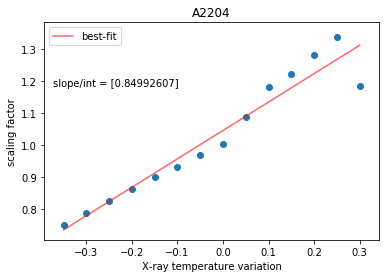

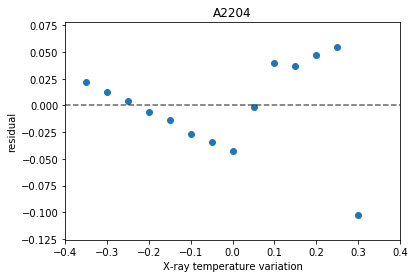

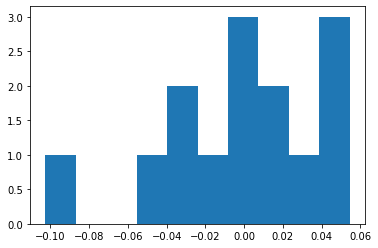

mu = -0.0007607867568243952
stdev = 0.0406784582039903



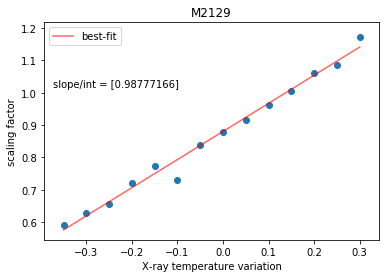

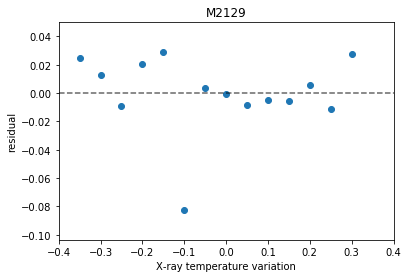

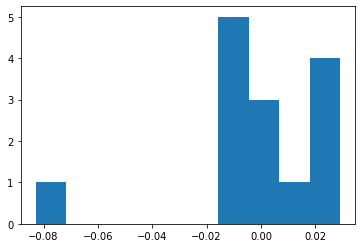

mu = 7.764029259116815e-05
stdev = 0.02678671276416968



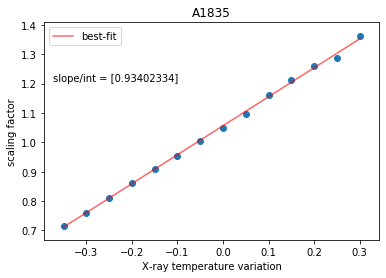

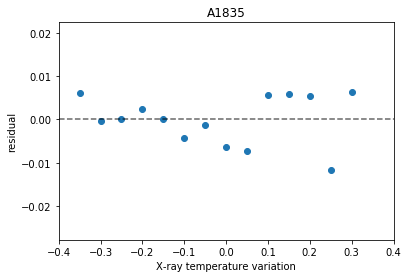

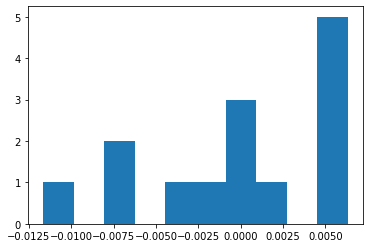

mu = 4.82519513613447e-05
stdev = 0.00550998410461079



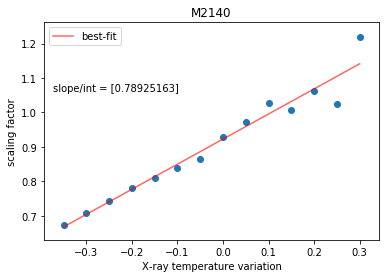

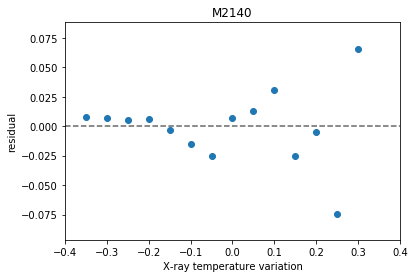

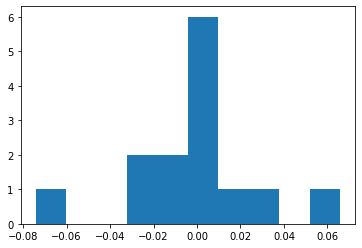

mu = -0.00031453000807131183
stdev = 0.030150807483625634



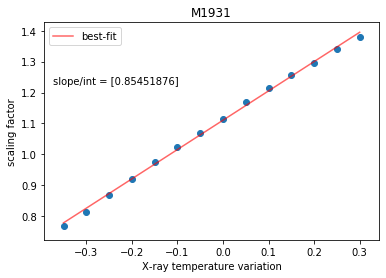

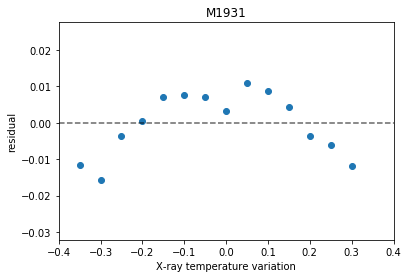

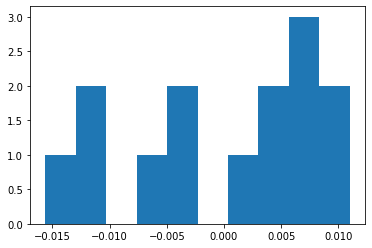

mu = -0.0002521145847696409
stdev = 0.008323818488494816



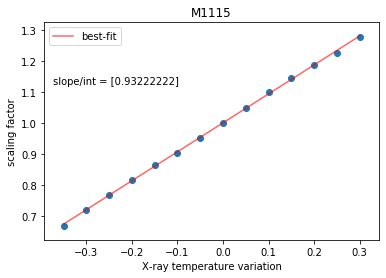

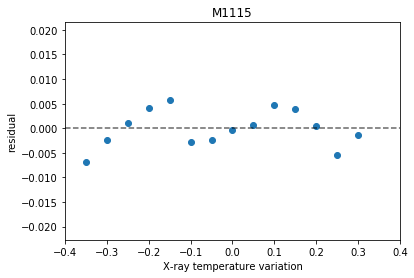

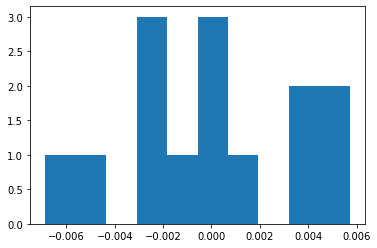

mu = -7.097430865927793e-05
stdev = 0.003642710849594432



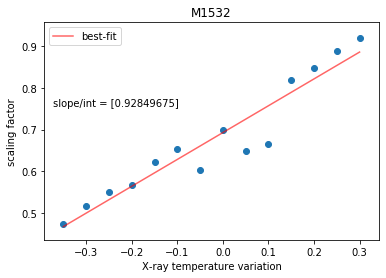

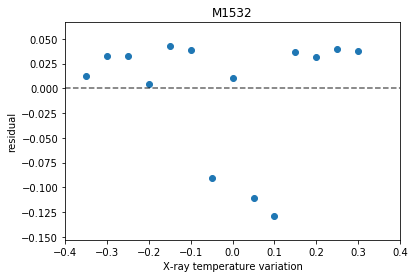

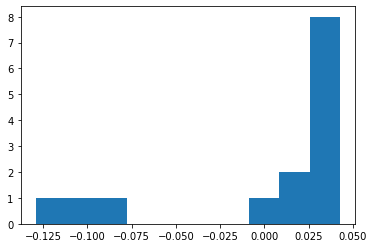

mu = -0.0007883121703973588
stdev = 0.058780377239609626



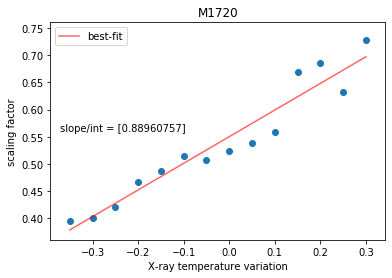

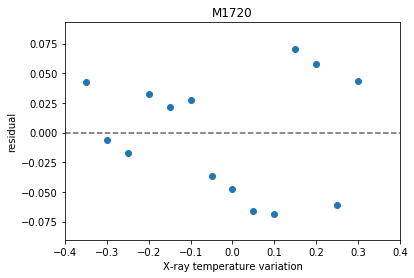

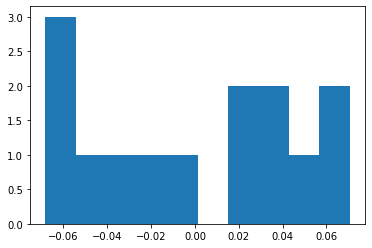

mu = -0.0005854396153876512
stdev = 0.047087342495350334



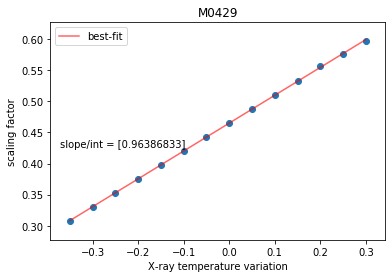

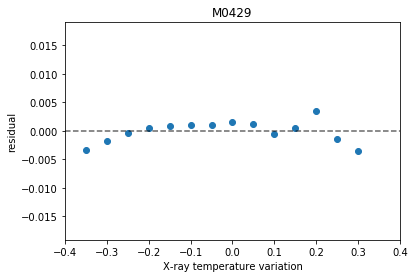

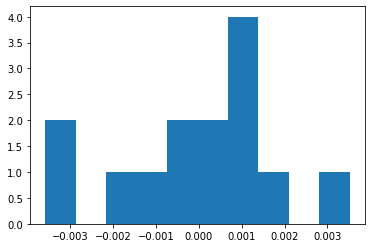

mu = -5.4663433685186906e-05
stdev = 0.0018734929673923254



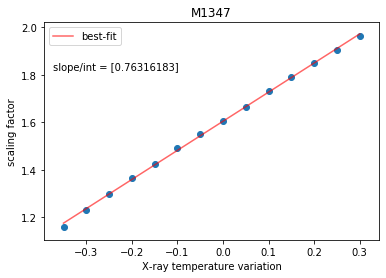

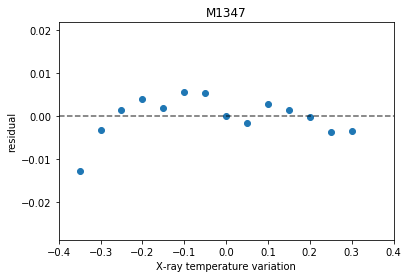

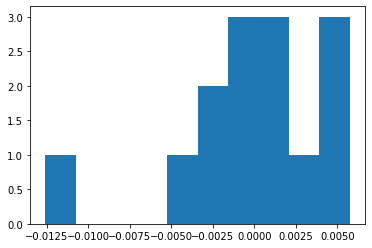

mu = -9.055880898130757e-05
stdev = 0.0045621043777434



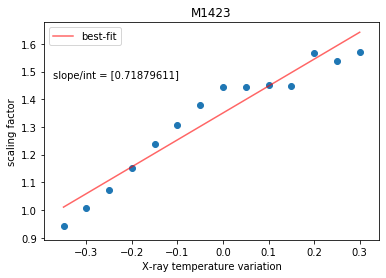

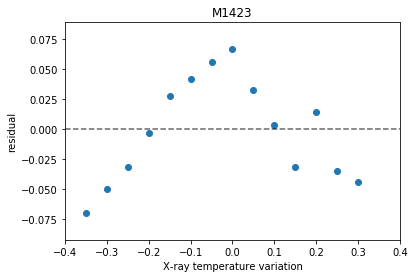

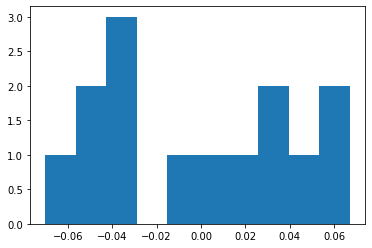

mu = -0.0015805761306641568
stdev = 0.04141142433962495



In [198]:
for i in range(0, 11):

    fig, ax = plt.subplots()
    ax.scatter(x, bolocam_clusters[i])
    plt.title(bolocam_names[i])
    plt.xlabel('X-ray temperature variation')
    plt.ylabel('scaling factor')

    reg = LinearRegression().fit(x, bolocam_clusters[i])
    pred_y = reg.predict(x)
    ax.plot(x, pred_y, color='red', label='best-fit', alpha=0.6)
    plt.text(ax.get_xlim()[0] + 0.02, ax.get_ylim()[1] - 0.2, s='slope/int = ' + str(reg.coef_/reg.intercept_), horizontalalignment='left')
    plt.legend()
    #plt.savefig('xray_temp/' + bolocam_names[i] + '_fit.jpg')
    plt.show()

    slope.append((reg.coef_/reg.intercept_)[0])
    
    residuals = bolocam_clusters[i] - pred_y
    chisq = (bolocam_clusters[i] - pred_y)**2 / pred_y

    fig, ax = plt.subplots()
    ax.scatter(x, np.log(bolocam_clusters[i]/pred_y))
    ax.hlines(0, -0.4, 0.4, ls='--', alpha=0.6)
    ax.set_xlim(-0.4, 0.4)
    plt.xlabel('X-ray temperature variation')
    plt.ylabel('residual')
    plt.title(bolocam_names[i])
    #plt.savefig('xray_temp/' + bolocam_names[i] + '_residuals.jpg')
    plt.show()

    plt.hist(np.log(bolocam_clusters[i]/pred_y))
    mu, std = stats.norm.fit(np.log(bolocam_clusters[i]/pred_y))
    xmin, xmax = plt.xlim()
    x_fit = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x_fit, mu, std)
    #plt.plot(x_fit, p, 'k-', lw=2, alpha=0.6, label='')
    #plt.savefig('xray_temp/' + bolocam_names[i] + '_hist.jpg')
    plt.show()
    print('mu = ' + str(mu))
    print('stdev = ' + str(std) + '\n')

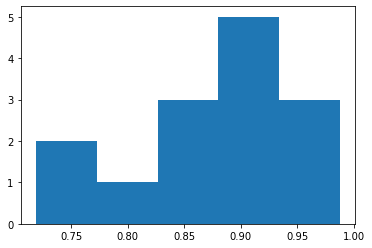

average = 0.8786948895139062
stdev = 0.07538615445847711


In [199]:
plt.hist(slope, bins=5)
plt.show()

print('average = ' + str(np.mean(slope)))
print('stdev = ' + str(np.std(slope)))

In [200]:
print(slope)

[0.8967904548378033, 0.8606934210806869, 0.9326003020108651, 0.8499260720688757, 0.9877716649839489, 0.9340233365976645, 0.7892516312487842, 0.8545187631985314, 0.932222220220598, 0.928496746458922, 0.8896075747722327, 0.9638683286144264, 0.7631618273313902, 0.7187961097699559]
